In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ugradio 
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 3 #set the value globally
plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 22})

# Load in Initial On/Off Data

In [193]:
data_on = np.load('Data/Raspberry_Pi/data2_on_raw.npy')
data_off = np.load('Data/Raspberry_Pi/data2_off_raw.npy')

## Calculate the Average Power

In [312]:
freqs = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6)) /1e6 #we sampled with resolution of 2048 samples at 2.2 MHz

def calc_ave_power(data):
    """
    A function to calculate the average power of sampled data
    """
    fft = np.fft.fft(data)
    power = np.abs(fft)**2
    avg = np.mean(power,axis=0)
    
    return avg
    

In [313]:
avg_on = calc_ave_power(data_on)
avg_off = calc_ave_power(data_off)

## Plot Data

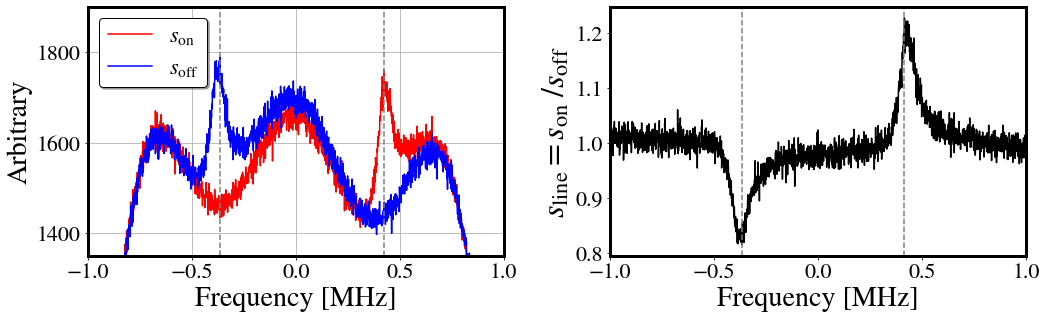

In [324]:
s_line = avg_on/avg_off
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs,np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs,np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(freqs[np.argmax(np.fft.fftshift(avg_on))],0,2500, linestyle="--", color="gray")
axes[0].axvline(freqs[np.argmax(np.fft.fftshift(avg_off))],0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1350, 1900)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]", fontsize=28)
axes[0].set_ylabel("Arbitrary", fontsize=28)
axes[0].grid()
axes[0].legend(edgecolor="black", shadow=True)

axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
axes[1].set_xlim(-1,1)
axes[1].axvline(freqs[np.argmax(np.fft.fftshift(s_line))],0,2500, linestyle="--", color="gray")
axes[1].axvline(freqs[np.argmin(np.fft.fftshift(s_line))],0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Frequency [MHz]", fontsize=28)
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=32)
f.tight_layout()
# plt.savefig("long_integration.pdf", dpi=300)
plt.show()



# Blackbody Callibration

In [197]:
sky_raw = np.load('Data/Raspberry_Pi/data2_on_raw.npy').reshape(-1,2048) #our data had 2048 samples
blackbody_raw = np.load('Data/Raspberry_Pi/data2_cal_raw.npy')

In [198]:
avg_sky = calc_ave_power(sky_raw)
avg_blackbody = calc_ave_power(blackbody_raw)

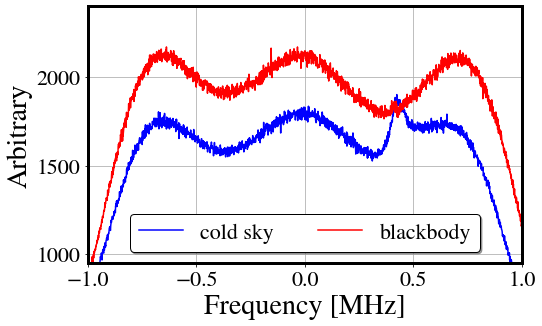

In [307]:

f, axes = plt.subplots(1,1, figsize=(8,5))

axes.plot(freqs,np.fft.fftshift(avg_sky)*G,color="blue", label='cold sky')
axes.plot(freqs,np.fft.fftshift(avg_blackbody)*G ,color="red",label='blackbody')
# axes[0].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes.set_ylim(950, 2400)
axes.set_xlim(-1,1)
axes.set_xlabel("Frequency [MHz]", fontsize=28)
axes.set_ylabel("Arbitrary", fontsize=28)
axes.grid()
axes.legend(ncol=2, edgecolor="black", shadow=True)


# axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
# axes[1].set_xlabel("Frequency [MHz]")
# axes[1].set_ylabel("$s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=26)
f.tight_layout()
# plt.savefig("BlackBody_Callibration.pdf", dpi=300)
plt.show()

In [327]:
ΔT = (np.mean(np.fft.fftshift(avg_blackbody - avg_sky)[:1024]) )

G = 300 / ΔT #300 Kelvin for human blackbody
print("Gain: {0:0.4f}".format(G)) 

Gain: 1.0798


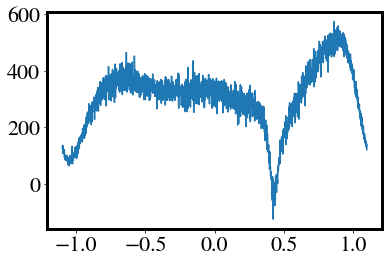

In [328]:
plt.plot(freqs, np.fft.fftshift(avg_blackbody - avg_sky)*G)

# Plot $s_{\mathrm{line}}$ with Units

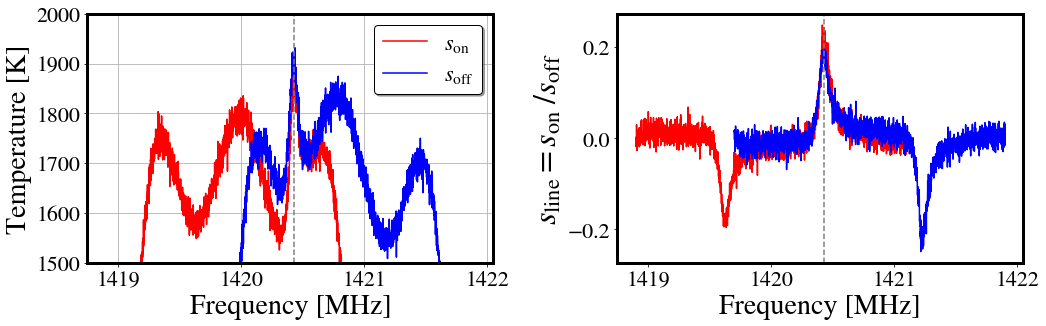

In [342]:
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs + 1420, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs + 1420.8, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(1420.43,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2000)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]", fontsize=28)
axes[0].set_ylabel("Temperature [K]", fontsize=28)
axes[0].grid()
axes[0].legend(edgecolor="black", shadow=True)


axes[1].plot(freqs + 1420, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(freqs + 1420.8, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes[1].axvline(1420.43,0,2500, linestyle="--", color="gray")
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Frequency [MHz]", fontsize=28)
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=32)
f.tight_layout()
# plt.savefig("physical_units_long_integration.pdf", dpi=300)
plt.show()

# Doppler Shift Calculations

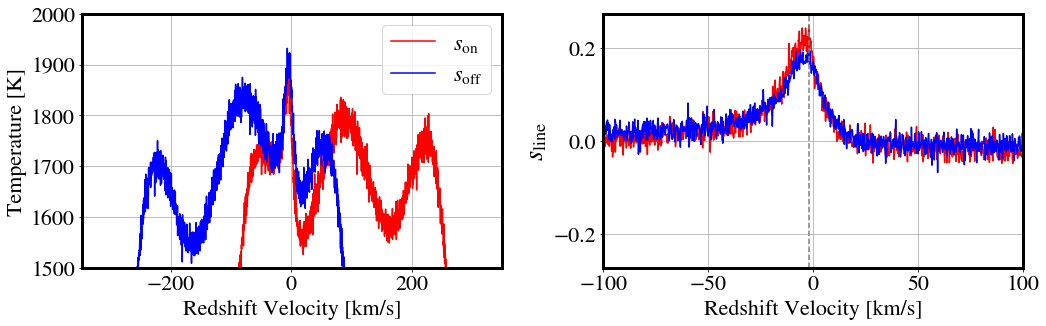

In [206]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(velocity_on, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(velocity_off, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
# axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2000)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Redshift Velocity [km/s]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend()

axes[1].plot(velocity_on, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(velocity_off, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes[1].set_xlim(-100,100)
axes[1].axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)],0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Redshift Velocity [km/s]")
axes[1].set_ylabel("$s_{\mathrm{line}}$", fontsize=26)
axes[1].grid()
f.tight_layout()
plt.show()

In [207]:
v_21cm = velocity_on[np.argmax(np.fft.fftshift(s_line))]
print("We find that the 21 cm line is moving away from us at {0:0.3f} km/s".format(v_21cm))

We find that the 21 cm line is moving away from us at -2.096 km/s


In [288]:
RA, DEC = 6.45, 62.726 #RA, DEC for our observations
JD = 2459632.0472222
# JD = 2459632.3805556

correction = ugradio.doppler.get_projected_velocity(RA, DEC,JD).value / 1000
print("We have a velocity correction of {0:0.3f} km/s".format(correction))

We have a velocity correction of -17.004 km/s


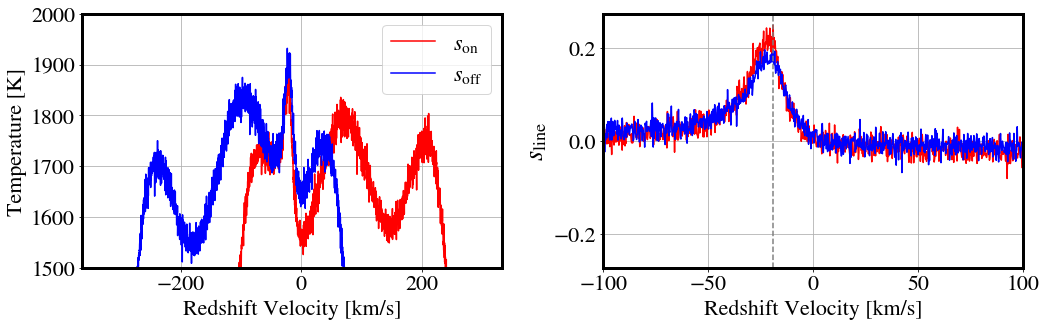

In [289]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(velocity_on + correction, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(velocity_off + correction, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
# axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2000)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Redshift Velocity [km/s]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend()

axes[1].plot(velocity_on + correction, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(velocity_off + correction, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes[1].set_xlim(-100,100)
axes[1].axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)] + correction,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Redshift Velocity [km/s]")
axes[1].set_ylabel("$s_{\mathrm{line}}$", fontsize=26)
axes[1].grid()
f.tight_layout()
plt.show()

In [290]:
v_21cm = velocity_on[np.argmax(np.fft.fftshift(s_line))] + correction
print("We find that the 21 cm line is actually moving away from us at {0:0.3f} km/s".format(v_21cm))

We find that the 21 cm line is actually moving away from us at -19.100 km/s


# Observations & Coordinates

In [291]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle

In [293]:
cal_lat, cal_lon = 37.8715, 122.2730
RA_z = ugradio.timing.lst(jd = 2459632.0472222)
DEC_z = cal_lat

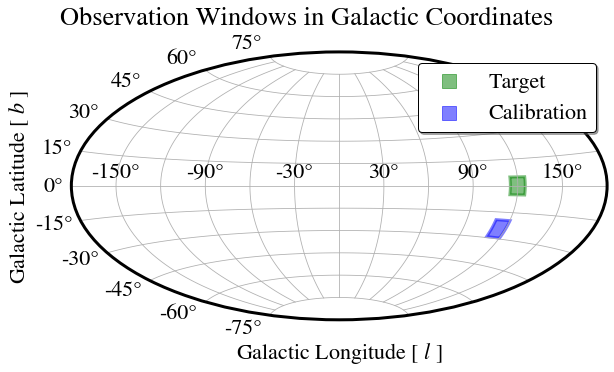

In [296]:
dg = u"\N{DEGREE SIGN}"

def plot_FOV(ax, RA, DEC, color, label):
    
    FOV = (10 * (np.pi/180))/ 2 #set by the telescope. We have a 10 degree field of view
    
    xarr = [RA]
    yarr = [DEC]

    eq = SkyCoord(xarr[:], yarr[:], unit=u.deg)
    gal = eq.galactic

    ax.scatter([],[],alpha=0.5,marker="s",s=200,color=color, label=label)
    ax.add_patch(Rectangle((gal.l.wrap_at('180d').radian - FOV, gal.b.radian - FOV),FOV*2 , FOV*2,
                 edgecolor = color,
                 facecolor = color,
                 alpha=0.5,
                 fill=True,
                 lw=3))
    

f = plt.figure(figsize=(9,5.5))

ax = plt.subplot(111, projection='aitoff')
ax.grid(True)

plot_FOV(ax, RA, DEC, color="green", label="Target")
plot_FOV(ax, RA_z, DEC_z, color="blue", label="Calibration")

ax.set_xticklabels(["-150"+dg," ", "-90"+dg, " ","-30"+dg, " ","30"+dg, " ","90"+dg," ", "150"+dg])
ax.set_xlabel("Galactic Longitude [ $l$ ]", labelpad=20)
ax.set_ylabel("Galactic Latitude [ $b$ ]")
ax.legend(edgecolor="black", shadow=True)
f.suptitle("Observation Windows in Galactic Coordinates")
f.tight_layout()
plt.savefig("Observing_Windows.pdf", dpi=300)
plt.show()